# Sentiment Classification with Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

# Curate a Dataset

In [2]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [3]:
len(reviews)

25000

In [4]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [5]:
labels[0]

'POSITIVE'

# Understand how data is manipulated

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Quick Theory Validation

In [7]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [8]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

In [9]:
for review, label in zip(reviews, labels):
    for word in review.split(' '):
        total_counts[word] += 1
        if label == 'POSITIVE':
            positive_counts[word] += 1
        else:
            negative_counts[word] += 1

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [10]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [11]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

Next: Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [12]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words

total_counts_trimmed = {item for item in total_counts.items() if item[1] >= 100}

for word, count in total_counts_trimmed:#.most_common(100):
    pos_neg_ratios[word] = positive_counts[word] / (float(negative_counts[word] + 1))

Examine the ratios you've calculated for a few words:

In [13]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value from neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

Next: Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [14]:
# TODO: Convert ratios to logs
for word, ratio in pos_neg_ratios.items():
    pos_neg_ratios[word] = np.log(ratio)

Examine the new ratios you've calculated for the same words from before:

In [15]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [16]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

023763802),
 ('spring', 0.7537718023763802),
 ('enjoyable', 0.7524637577163648),
 ('immensely', 0.7519876805828787),
 ('sir', 0.7507762933965817),
 ('nevertheless', 0.7506710246981319),
 ('driven', 0.7499447789530785),
 ('performances', 0.7488325251606314),
 ('nowadays', 0.7472144018302211),
 ('memories', 0.7472144018302211),
 ('simple', 0.7464142097414326),
 ('leslie', 0.7453329337305156),
 ('golden', 0.7453329337305156),
 ('lovers', 0.7449722484245312),
 ('relationship', 0.7448423234560179),
 ('supporting', 0.7435780341868372),
 ('che', 0.742627237823315),
 ('packed', 0.7410032017375805),
 ('trek', 0.7402146914179311),
 ('provoking', 0.7384037721480662),
 ('strikes', 0.7375989431307791),
 ('depiction', 0.736822244062607),
 ('emotional', 0.7367821164568152),
 ('secretary', 0.7366322924996842),
 ('florida', 0.7351113796589775),
 ('influenced', 0.7351113796589775),
 ('germany', 0.7328875092094594),
 ('brings', 0.7314293671309623),
 ('lewis', 0.7312989465243216),
 ('elderly', 0.730887508

In [17]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

# Transforming Text into Numbers
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

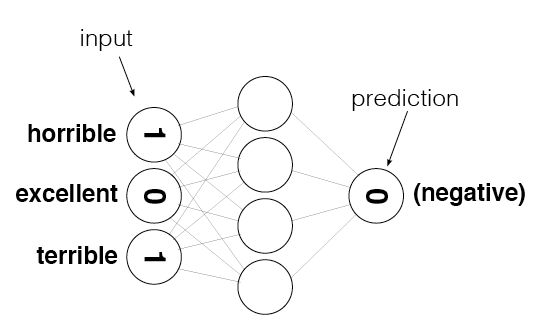

In [18]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

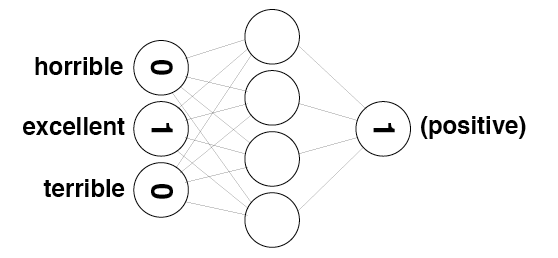

In [19]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

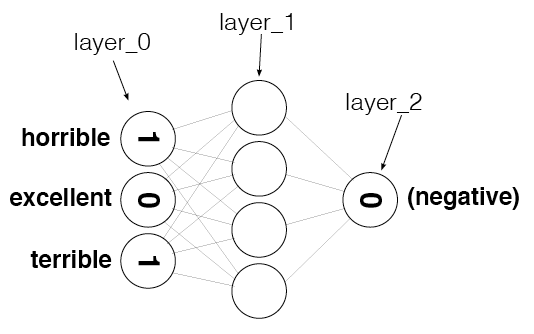

In [28]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

In [20]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    res = 0
    if label == 'POSITIVE': res = 1
    
    return res

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [21]:
labels[0]

'POSITIVE'

In [22]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [23]:
labels[1]

'NEGATIVE'

In [24]:
get_target_for_label(labels[1])

0

In [29]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [30]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  """Entry point for launching an IPython kernel.


In [31]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [32]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  """Entry point for launching an IPython kernel.


# Building a Neural Network

Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [47]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1, min_count=50, polarity_cutoff=.05):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels, min_count, polarity_cutoff)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels, min_count, polarity_cutoff):
        
        total_counts = Counter()
        positive_counts = Counter()
        negative_counts = Counter()
        
        for review, label in zip(reviews, labels):
            for word in review.split(' '):
                total_counts[word] += 1
                if label == 'POSITIVE':
                    positive_counts[word] += 1
                else:
                    negative_counts[word] += 1

        total_counts_trimmed = {item for item in total_counts.items() if item[1] >= min_count}
        
        self.pos_neg_ratios = Counter()

        for word, count in total_counts_trimmed:
            ratio = positive_counts[word] / (float(negative_counts[word] + 1))
            if ratio > 1:
                polarity = np.log(ratio)
            else:
                polarity = - np.log(1 / (ratio + .01))
                
            if abs(polarity) > polarity_cutoff :
                self.pos_neg_ratios[word] = polarity
        
        # populate review_vocab with all of the words in the given reviews
        self.review_vocab = set(self.pos_neg_ratios.keys())

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(self.review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        # There is no need to split the labels because each one is a single word.
        label_vocab = set(labels)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # populate self.word2index with indices for all the words in self.review_vocab
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # do the same thing you did for self.word2index and self.review_vocab, 
        # but for self.label2index and self.label_vocab instead
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        # the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.rand(self.hidden_nodes, self.output_nodes)
        
        # Create the hidden layer, a two-dimensional matrix with shape 
        # 1 x hidden_nodes, with all values initialized to zero
        self.layer_1 = np.zeros((1,hidden_nodes))
                
    def get_target_for_label(self,label):
        # Copy the code you wrote for get_target_for_label
        res = 0
        if label == 'POSITIVE': res = 1
        return res
        
    def sigmoid(self,x):
        # Return the result of calculating the sigmoid activation function
        return 1. / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # Return the derivative of the sigmoid activation function, 
        # where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #       Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            
            self.layer_1 *= 0
            indices = {self.word2index[word] for word in review.split(' ') if word in self.word2index.keys()}
            for index in indices:
                self.layer_1 += self.weights_0_1[index]
            self.layer_2 = np.dot(self.layer_1, self.weights_1_2)
            self.layer_2 = self.sigmoid(self.layer_2)
            
            #       Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.

            error = self.get_target_for_label(label) - self.layer_2
            output_error_term = error * self.sigmoid_output_2_derivative(self.layer_2)
            hidden_error = output_error_term * self.weights_1_2.T
            hidden_error_term = hidden_error
            
            delta_weights_1_2 = np.dot(output_error_term, self.layer_1).T
            
            n_records = len(training_reviews)
            self.weights_1_2 += np.dot(self.layer_1.T, output_error_term) * self.learning_rate
            for index in indices:
                self.weights_0_1[index] += self.learning_rate * hidden_error_term[0]
            
            #       Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if (abs(error) < 0.5): correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        #       Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        
        self.layer_1 *= 0
        indices = {self.word2index[word] for word in review.split(' ') if word in self.word2index.keys()}
        for index in indices:
            self.layer_1 += self.weights_0_1[index]
        self.layer_2 = np.dot(self.layer_1, self.weights_1_2)
        self.layer_2 = self.sigmoid(self.layer_2)
        
        #       The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        res = 'POSITIVE'
        if self.layer_2[0] < 0.5: res = 'NEGATIVE'
        return res


Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [48]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):6162. #Correct:500 #Tested:1000 Testing Accuracy:50.0%

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

Accuracy is 50% because the Neural Network was just crated with random weights and it is not trained yet.

In [49]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):2294. #Correct:2047 #Trained:2501 Training Accuracy:81.8%
Progress:20.8% Speed(reviews/sec):2370. #Correct:4088 #Trained:5001 Training Accuracy:81.7%
Progress:31.2% Speed(reviews/sec):2530. #Correct:6141 #Trained:7501 Training Accuracy:81.8%
Progress:41.6% Speed(reviews/sec):2606. #Correct:8231 #Trained:10001 Training Accuracy:82.3%
Progress:52.0% Speed(reviews/sec):2662. #Correct:10327 #Trained:12501 Training Accuracy:82.6%
Progress:62.5% Speed(reviews/sec):2660. #Correct:12426 #Trained:15001 Training Accuracy:82.8%
Progress:72.9% Speed(reviews/sec):2665. #Correct:14510 #Trained:17501 Training Accuracy:82.9%
Progress:83.3% Speed(reviews/sec):2670. #Correct:16658 #Trained:20001 Training Accuracy:83.2%
Progress:93.7% Speed(reviews/sec):2679. #Correct:18806 #Trained:22501 Training Accuracy:83.5%
Progress:99.9% Speed(reviews/sec):2676. #Correct:20083 #Trained:24000 Training Ac

# Test the Neural Network performance

In [50]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):3527. #Correct:823 #Tested:1000 Testing Accuracy:82.3%

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [37]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [38]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):671.5 #Correct:1943 #Trained:2501 Training Accuracy:77.6%
Progress:20.8% Speed(reviews/sec):688.8 #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):708.9 #Correct:6118 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):724.7 #Correct:8271 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):727.6 #Correct:10431 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):696.4 #Correct:12552 #Trained:15001 Training Accuracy:83.6%
Progress:72.9% Speed(reviews/sec):688.1 #Correct:14676 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):676.9 #Correct:16867 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):653.8 #Correct:19048 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):639.0 #Correct:20372 #Trained:24000 Training 

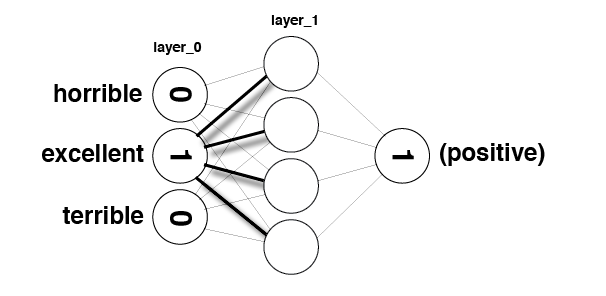

In [39]:
Image(filename='sentiment_network_sparse.png')

In [40]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [41]:
get_most_similar_words("excellent")

76406193),
 ('dramas', 0.017151990903362294),
 ('lovable', 0.017151916639193156),
 ('delight', 0.0171482766199392),
 ('timing', 0.017090972612849534),
 ('deeper', 0.017071781007633104),
 ('realize', 0.017070346875048298),
 ('sensitive', 0.01704378481269706),
 ('willing', 0.0170045011175386),
 ('complaint', 0.016984421846480264),
 ('opposite', 0.01697397128471507),
 ('grand', 0.016946650873301407),
 ('miss', 0.016920852700215816),
 ('considered', 0.01691825746999281),
 ('con', 0.016915188022424005),
 ('carrey', 0.01690609189753998),
 ('helped', 0.016901921941881448),
 ('higher', 0.01688610789814373),
 ('laughing', 0.016863526352721675),
 ('touch', 0.01685900459180183),
 ('legendary', 0.016844052770347707),
 ('touched', 0.016826925422247407),
 ('raw', 0.01679980288910372),
 ('faults', 0.016799177105173396),
 ('manages', 0.01678965817751182),
 ('awards', 0.016733015354260167),
 ('stellar', 0.01670373059501218),
 ('strength', 0.016666147005844217),
 ('fan', 0.01666045116909486),
 ('winning

In [42]:
get_most_similar_words("terrible")

00627969235),
 ('useless', 0.01349570387739023),
 ('church', 0.013453245472899247),
 ('destroy', 0.013436235385843539),
 ('year', 0.01342338688223186),
 ('spending', 0.013379331458108011),
 ('empty', 0.013355686124218653),
 ('hated', 0.013306702904486104),
 ('downright', 0.013280997071204054),
 ('had', 0.013279833087718976),
 ('five', 0.013276603740856593),
 ('much', 0.013254603245945611),
 ('alas', 0.013229287635441705),
 ('entirely', 0.013221845027734346),
 ('imdb', 0.013207569088642627),
 ('dreck', 0.013186701665542963),
 ('murray', 0.013167604032148283),
 ('vampires', 0.013153928278820124),
 ('gay', 0.013149170145372716),
 ('horrid', 0.013141690842980237),
 ('tolerable', 0.013116757673088918),
 ('middle', 0.01311444969092686),
 ('cannot', 0.013108320237534082),
 ('soldiers', 0.013091761054981152),
 ('failure', 0.013053539425767648),
 ('cop', 0.013022539063626446),
 ('apparent', 0.013008203623374893),
 ('grave', 0.012990901693631499),
 ('mike', 0.01297863408445324),
 ('screaming', 0

In [43]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [51]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [53]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words